# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'.

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I.
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II.
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III.
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'.

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [10]:
N = 12
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Gaming'


## I.
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


data = pd.read_csv('teen_phone_addiction_dataset.csv')
column = data['Time_on_Gaming']


mean = column.mean()  # Среднее
variance = column.var()  # Дисперсия
mode = column.mode()[0]   #  Мода
median = column.median()   # Медиана
quantiles = {
    "Q1": column.quantile(0.25),
    "Q2": column.quantile(0.5),
    "Q3": column.quantile(0.75)
}  # Квантили уровня 0.25, 0.5, 0.75
kurtosis = column.kurtosis()   # Эксцесс
skewness = column.skew()       # Ассиметрия
iqr = stats.iqr(column)        # Интерквартильный размах

print(f"Среднее: {mean}")
print(f"Дисперсия: {variance}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Квантили:")
for name, value in quantiles.items():
    print(f"{name}: {value}")
print(f"Эксцесс: {kurtosis}")
print(f"Ассиметрия: {skewness}")
print(f"Интерквартильный размах: {iqr}")

Среднее: 1.5252666666666663
Дисперсия: 0.869931572746471
Мода: 0.0
Медиана: 1.5
Квантили:
Q1: 0.8
Q2: 1.5
Q3: 2.2
Эксцесс: -0.49820635694718174
Ассиметрия: 0.2590108181356894
Интерквартильный размах: 1.4000000000000001


Среднее ≈ 1.53, медиана = 1.5, мода = 0: распределение сосредоточено около 1.5, но наличие нулей сдвигает моду вниз.  
Дисперсия ≈ 0.87: разброс данных умеренный.  
Квантили: Q1 = 0.8, Q2 = 1.5, Q3 = 2.2, половина значений лежит в этом диапазоне.  
Интерквартильный размах ≈ 1.4: 50% наблюдений сосредоточены в промежутке шириной около 1.4.  
Эксцесс ≈ –0.50: распределение более плоское, чем нормальное.  
Асимметрия ≈ 0.26: слабая положительная скошенность, распределение близко к симметричному.  
В целом данные близки к симметричному распределению с умеренной вариативностью.  

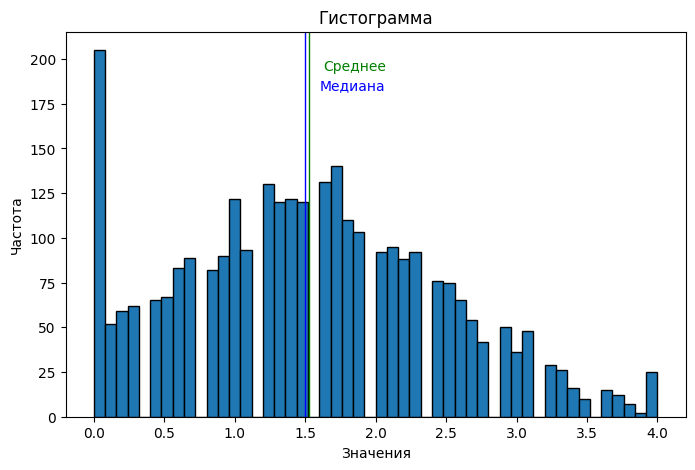

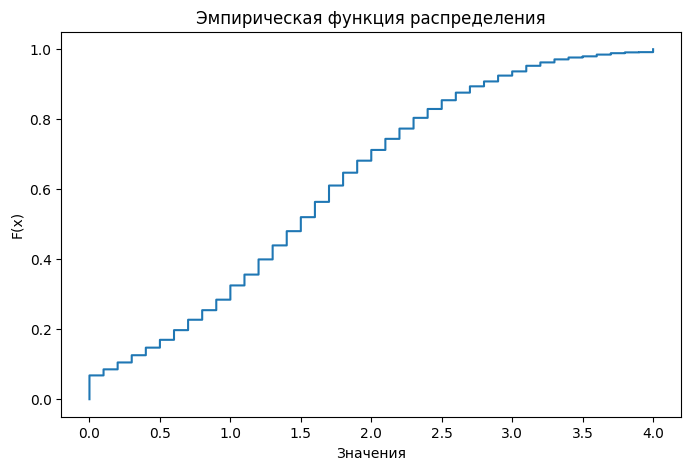

In [12]:
# Графики

# Гистограмма
plt.figure(figsize=(8, 5))
plt.hist(column, bins=50, edgecolor='black')
plt.axvline(mean, color='green', linestyle='-', linewidth=1, label=f'Среднее = {mean:.2f}')
plt.axvline(median, color='blue', linestyle='-', linewidth=1, label=f'Медиана = {median:.2f}')
plt.text(mean + 0.1, plt.ylim()[1]*0.9, 'Среднее', color='green')
plt.text(median + 0.1, plt.ylim()[1]*0.85, 'Медиана', color='blue')
plt.title('Гистограмма')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

# Эмпирическая функция распределения
sorted_col = np.sort(column)
ecdf = np.arange(1, len(sorted_col)+1) / len(sorted_col)

plt.figure(figsize=(8, 5))
plt.step(sorted_col, ecdf, where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значения')
plt.ylabel('F(x)')
plt.show()


## II.
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot


In [13]:
# Критерий Хи-квадрат - степень расхождения между наблюдаемыми частотами и ожидаемыми частотами, если бы данные были распределены нормально.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = column.dropna().values

mu = np.mean(data)
sigma = np.std(data, ddof=1)

k = 1 + int(np.log2(len(data)))  # формула Стерджеса
observed_freq, bin_edges = np.histogram(data, bins=k) # O_i  - observed
expected_freq = np.array([                             # E_i  - expected
    len(data) * (norm.cdf(bin_edges[i+1], mu, sigma) - norm.cdf(bin_edges[i], mu, sigma))
    for i in range(len(bin_edges)-1)
])

# Статистика Хи-квадрат
chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
print(f"Статистика Хи-квадрат: {chi2_stat}")


Статистика Хи-квадрат: 455.36372666221314


In [14]:
from scipy.stats import chi2
p = 2
df = k - p -1
print(f"df (degrees of freedom):  {df}")   # число степеней свободы

alpha = 0.05
df = k - 3
chi2_crit = chi2.ppf(1 - alpha, df)   # Критическое значение Статистики Хи-квадрат
print(f"Критическое значение Статистики Хи-квадрат: {chi2_crit}")

p_value = 1 - chi2.cdf(chi2_stat, df)
print(f"p-value: {p_value}")

if chi2_stat > chi2_crit or p_value < alpha:
    print(" Гипотеза о нормальности отвергается")
else:
    print(" Гипотеза о нормальности НЕ отвергается")


df (degrees of freedom):  9
Критическое значение Статистики Хи-квадрат: 16.918977604620448
p-value: 0.0
 Гипотеза о нормальности отвергается


In [15]:
# Проверка по ассиметрии и эксцессу

print(f"Ассиметрия: {column.skew()}")
print(f"Эксцесс: {column.kurtosis()}")


Ассиметрия: 0.2590108181356894
Эксцесс: -0.49820635694718174


Асимметрия = 0.2590108181356894, значит распределение слегка тянется вправо (правый хвост чуть длиннее, что и видно на гистограмме).

Эксцесс = -0.49820635694718174 - распределение чуть более плоское и расплывчатое, чем нормальное, с менее тяжёлыми хвостами.

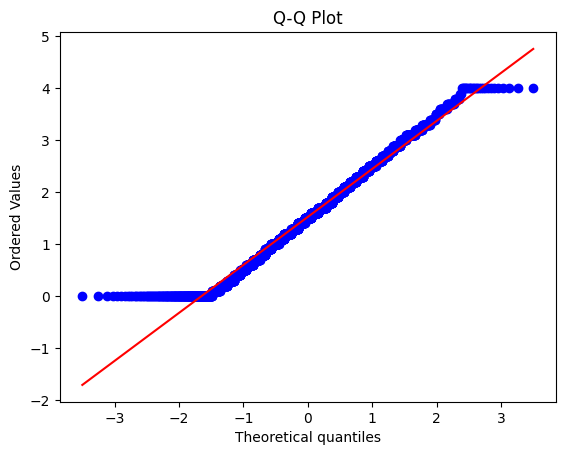

In [16]:
# Q-Q plot

import scipy.stats as stats

stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


В середине точки хорошо ложатся на прямую (распределение близко к нормальному)  

На концах:  слева значения выше линии,  справа ниже линии. Если бы распределение было нормальным, то точки ложились на красную линию.

Горизонтальные хвосты объясняются отрицательным значением эксцесса, распределение более плоское и с более лёгкими хвостами, чем нормальное.

## III.
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, stats
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from scipy.stats import iqr

data_path = 'teen_phone_addiction_dataset.csv'
df = pd.read_csv(data_path)
new_column = df['Time_on_Gaming']

data = new_column.dropna().values

#   Удаление, усечение выбросов
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
data_no_outliers = data[(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)]

# вместо логарифмирования применим нормализацию  Yeo-Johnson (Преобразование Йео-Джонсона)
#  Yeo-Johnson и стандартизация

pt = PowerTransformer(method='yeo-johnson')
data_yeojohnson = pt.fit_transform(data_no_outliers.reshape(-1, 1)).flatten()

data = data_yeojohnson
data_processed = (data - np.mean(data)) / np.std(data)   # стандартизация - преобразует данные так, чтобы среднее было 0, а стандартное отклонение — 1.

# Повторяем пункты 1, 2

new_column = pd.Series(data_processed)  # новые данные

mean = new_column.mean()  # Среднее
variance = new_column.var()  # Дисперсия
mode = new_column.mode()[0]   #  Мода
median = new_column.median()   # Медиана
quantiles = {
    "Q1": new_column.quantile(0.25),
    "Q2": new_column.quantile(0.5),
    "Q3": new_column.quantile(0.75)
}  # Квантили уровня 0.25, 0.5, 0.75
kurtosis_value = new_column.kurtosis()   # Эксцесс
skewness_value = new_column.skew()       # Ассиметрия
iqr_value = iqr(new_column)        # Интерквартильный размах

print(f"Среднее: {mean}")
print(f"Дисперсия: {variance}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Квантили:")
for name, value in quantiles.items():
    print(f"{name}: {value}")
print(f"Эксцесс: {kurtosis_value}")
print(f"Ассиметрия: {skewness_value}")
print(f"Интерквартильный размах: {iqr_value}")


Среднее: -3.0790185216271007e-17
Дисперсия: 1.0003334444814937
Мода: -1.817580823055424
Медиана: 0.050252543071794886
Квантили:
Q1: -0.7392853526729102
Q2: 0.050252543071794886
Q3: 0.7543075596733397
Эксцесс: -0.6466487215592926
Ассиметрия: -0.058148785698903756
Интерквартильный размах: 1.49359291234625


Среднее ≈ 0, медиана ≈ 0  — это результат стандартизации.  
мода ≈ -1.82: центр распределения сдвинут около нуля, но мода показывает пик в отрицательной области.  
Дисперсия ≈ 1: данные приведены к стандартной шкале, разброс около среднего единичный.  
Квантили: Q1 ≈ -0.74, Q2 ≈ 0.05, Q3 ≈ 0.75, половина значений находится в этом диапазоне.  
Интерквартильный размах ≈ 1.49: умеренный разброс между 25 и 75 процентилями.  
Эксцесс ≈ -0.65: распределение стало чуть более плоским (было -0.5), хвосты короче, чем у нормального.  
Асимметрия ≈ -0.06: распределение почти симметричное, небольшое смещение влево( исходные данные имели положительную скошенность (0.26))   
В целом стандартизированные данные имеют центр около нуля, единичную дисперсию и почти нормальное, симметричное распределение с умеренным разбросом.

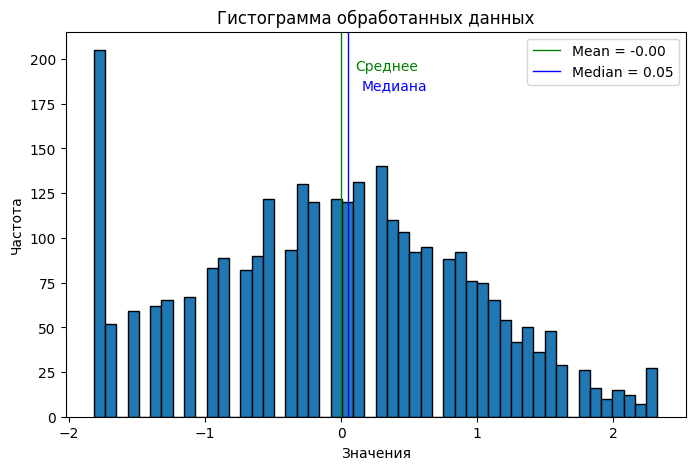

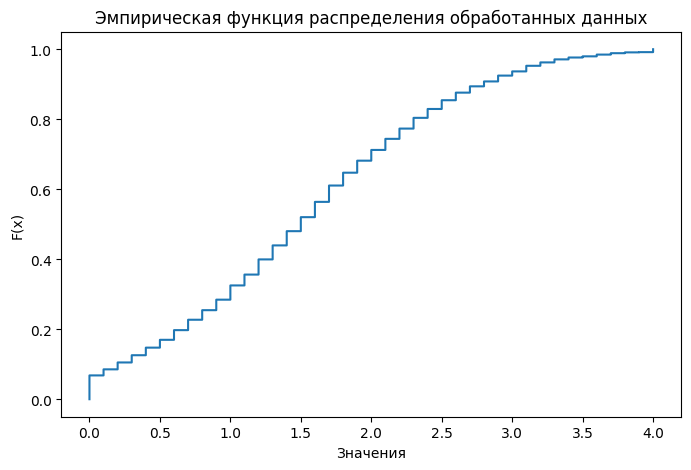

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, skew, kurtosis, probplot

# Гистограмма
plt.figure(figsize=(8, 5))
plt.hist(new_column, bins=50, edgecolor='black')
plt.axvline(mean, color='green', linestyle='-', linewidth=1, label=f'Mean = {mean:.2f}')
plt.axvline(median, color='blue', linestyle='-', linewidth=1, label=f'Median = {median:.2f}')
plt.text(mean + 0.1, plt.ylim()[1]*0.9, 'Среднее', color='green')
plt.text(median + 0.1, plt.ylim()[1]*0.85, 'Медиана', color='blue')
plt.title('Гистограмма обработанных данных')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()




# Эмпирическая функция распределения
sorted_proc = np.sort(column)
ecdf_proc = np.arange(1, len(sorted_proc)+1) / len(sorted_proc)

plt.figure(figsize=(8, 5))
plt.step(sorted_proc, ecdf_proc, where='post')
plt.title('Эмпирическая функция распределения обработанных данных')
plt.xlabel('Значения')
plt.ylabel('F(x)')
plt.show()


Графики подтверждают полученные характеристики данных.

Chi-squared statistic: 480.0373
df: 9
Критическое значение Статистики Хи-квадрат: 16.9190
p-value: 0.0000
 Гипотеза о нормальности отвергается


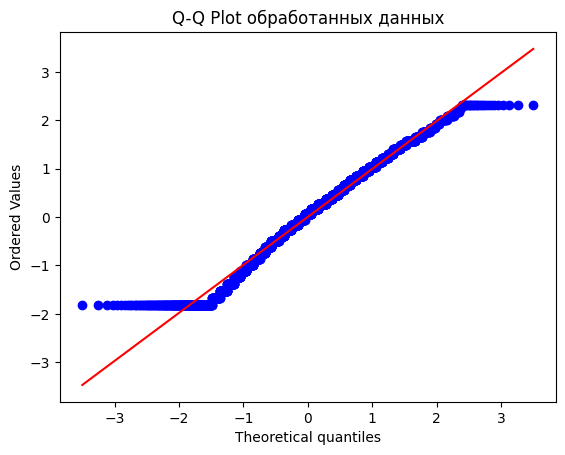

Ассиметрия: -0.0581
Эксцесс: -0.6466


In [19]:

#  Критерий Хи-квадрат
data_values = new_column.dropna().values
mu_proc = np.mean(data_values)
sigma_proc = np.std(data_values, ddof=1)

k_bins = 1 + int(np.log2(len(data_values)))
observed_freq, bin_edges = np.histogram(data_values, bins=k_bins)
expected_freq = np.array([
    len(data_values) * (norm.cdf(bin_edges[i+1], mu_proc, sigma_proc) - norm.cdf(bin_edges[i], mu_proc, sigma_proc))
    for i in range(len(bin_edges)-1)
])

chi2_stat_proc = np.sum((observed_freq - expected_freq)**2 / expected_freq)
print(f"Chi-squared statistic: {chi2_stat_proc:.4f}")

alpha = 0.05
df_proc = k_bins - 3  # степени свободы для нормальности
chi2_crit_proc = chi2.ppf(1 - alpha, df_proc)
p_value_proc = 1 - chi2.cdf(chi2_stat_proc, df_proc)

print(f"df: {df_proc}")
print(f"Критическое значение Статистики Хи-квадрат: {chi2_crit_proc:.4f}")
print(f"p-value: {p_value_proc:.4f}")

if chi2_stat_proc > chi2_crit_proc or p_value_proc < alpha:
    print(" Гипотеза о нормальности отвергается")
else:
    print(" Гипотеза о нормальности НЕ отвергается")

# Q-Q plot
probplot(data_values, dist="norm", plot=plt)
plt.title("Q-Q Plot обработанных данных")
plt.show()

#  Ассиметрия и эксцесс
skewness_proc = new_column.skew()
kurtosis_proc = new_column.kurtosis()

print(f"Ассиметрия: {skewness_proc:.4f}")
print(f"Эксцесс: {kurtosis_proc:.4f}")


Согласно Q-Q-графику по краям распределение остаётся отклонённым от нормального, поэтому полное приведение к нормальному распределению не удалось.Гистограмма обработанных данных показывает, что распределение стало более симметричным по сравнению с исходным.

После удаления выбросов и применения Yeo-Johnson + стандартизации данные стали почти симметричными вокруг среднего 0, с дисперсией ≈1.
Скошенность и экстремальные значения уменьшены, распределение стало ближе к нормальному, хотя идеальной нормальности может и не быть (малая отрицательная асимметрия и плоскость).

## IV.
Сгруппируйте данные по столбцу 'School_Grade'.

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы


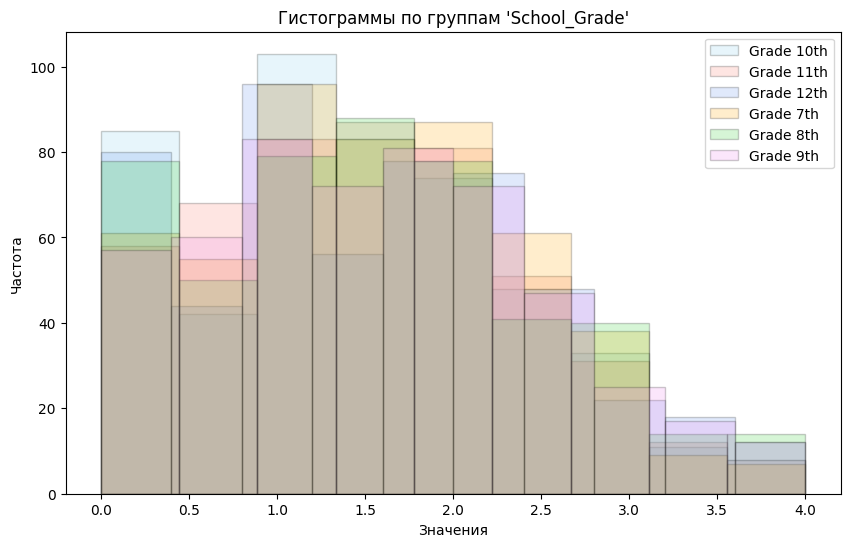

Grade 10th: Среднее = 1.453, Дисперсия = 0.860
Grade 11th: Среднее = 1.512, Дисперсия = 0.786
Grade 12th: Среднее = 1.520, Дисперсия = 0.942
Grade 7th: Среднее = 1.554, Дисперсия = 0.775
Grade 8th: Среднее = 1.539, Дисперсия = 0.963
Grade 9th: Среднее = 1.569, Дисперсия = 0.878


In [20]:

#  Группировка по 'School_Grade'

grouped = df.groupby('School_Grade')


colors = ['skyblue', 'salmon', 'cornflowerblue', 'orange', 'limegreen', 'violet']
column = 'Time_on_Gaming'



plt.figure(figsize=(10,6))

for i, (grade, group) in enumerate(grouped):
    data_group = group[column].dropna()
    num_of_bins = 1 + int(np.log2(len(data_group)))  # правило Райса
    plt.hist(data_group, bins=num_of_bins, alpha=0.2, label=f'Grade {grade}', color=colors[i % len(colors)], edgecolor='black')

plt.title("Гистограммы по группам 'School_Grade'")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.legend()
plt.show()


# Среднее и дисперсия по группам

for grade, group in grouped:
    data_group = group[column].dropna()
    mean_group = np.mean(data_group)
    var_group = np.var(data_group)
    print(f"Grade {grade}: Среднее = {mean_group:.3f}, Дисперсия = {var_group:.3f}")


Средние значения по классам колеблются в узком диапазоне от 1.453 до 1.569.
Это говорит о том, что среднее время на игры одинаковое для всех классов.
Нет явных различий между младшими и старшими классами.

Дисперсия по классам также близка друг к другу.
Рассеяние значений сравнимо между группами, нет группы с сильно большей или меньшей изменчивостью.